<a href="https://www.kaggle.com/code/pappuyadav0324/breast-cancer-classification-using-ann?scriptVersionId=267722673" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#loading the datasets from sklearn
import sklearn.datasets
breast_cancer_dataset=sklearn.datasets.load_breast_cancer()
#breast_cancer_dataset

In [4]:
# loading the data into dataframe
df=pd.DataFrame(breast_cancer_dataset.data,columns=(breast_cancer_dataset.feature_names))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# EDA Part

In [5]:
#add target
df['labels']=breast_cancer_dataset.target


In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.shape

(569, 31)

In [8]:
df['labels'].value_counts()

labels
1    357
0    212
Name: count, dtype: int64

In [9]:
#check for null value
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
labels                     0
dtype: int64

In [10]:
#check for duplicate value
df.duplicated().sum()

0

In [11]:
#check for nan value
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
labels                     0
dtype: int64

In [12]:
# statistical report of the data 
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
df.skew()
#result>0 --->Positive Skew
#result=0 --->Normal(no skew)
#result<0 --->Negative Skew

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

In [14]:
a=b=0
for i in df.skew():
    if i>0:
        a=a+1
    else:
        b=b+1
print('the total number of Negative skew is:',b)
print('the total number of Positive skew is:',a)

the total number of Negative skew is: 1
the total number of Positive skew is: 30


| Skew Type    | Tail Direction | Mean–Median–Mode Relation | Example        | Skewness Sign |
| ------------ | -------------- | ------------------------- | -------------- | ------------- |
| **Normal**   | None           | Mean = Median = Mode      | Heights        | 0             |
| **Negative** | Left           | Mean < Median < Mode      | Retirement age | < 0           |
| **Positive** | Right          | Mean > Median > Mode      | Income         | > 0           |


# Data Visualization Part

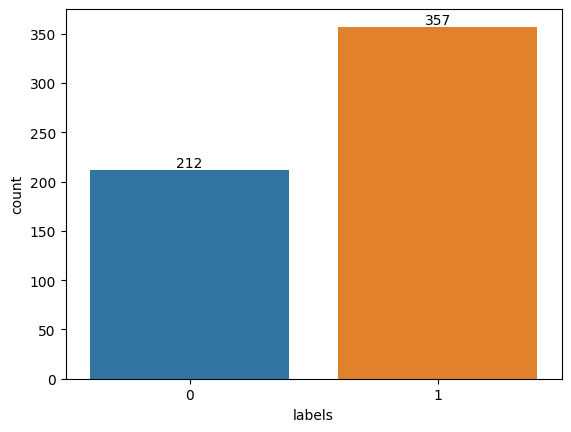

In [15]:
#visulaization of labels columns
import matplotlib.pyplot as plt
import seaborn as sns
ax=sns.countplot(df,x='labels')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

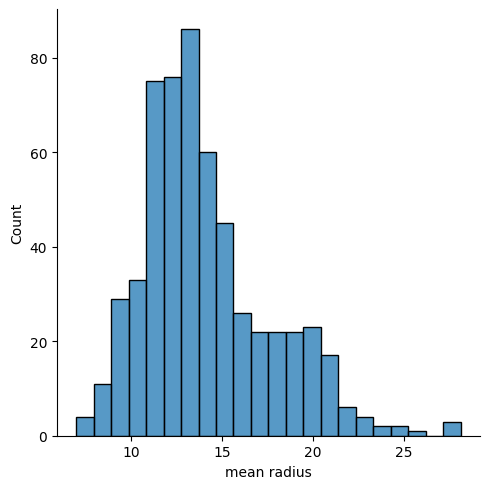

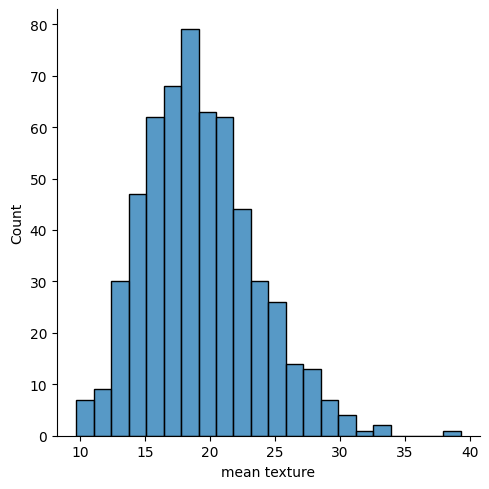

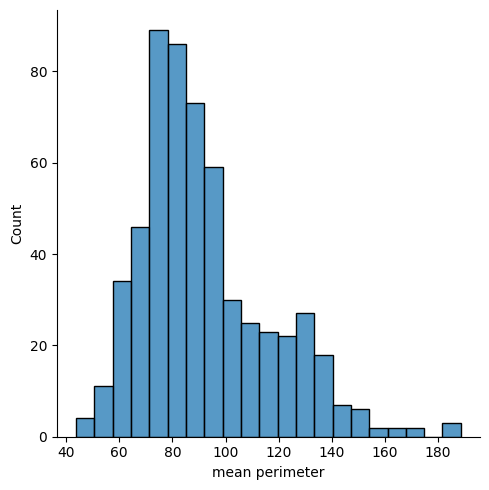

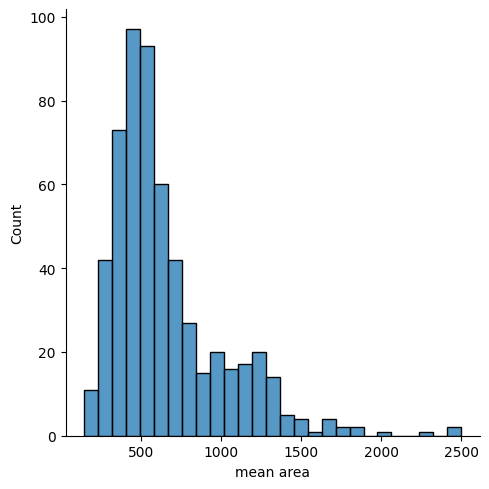

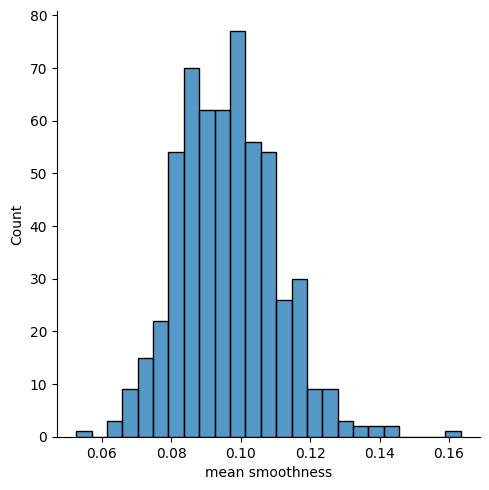

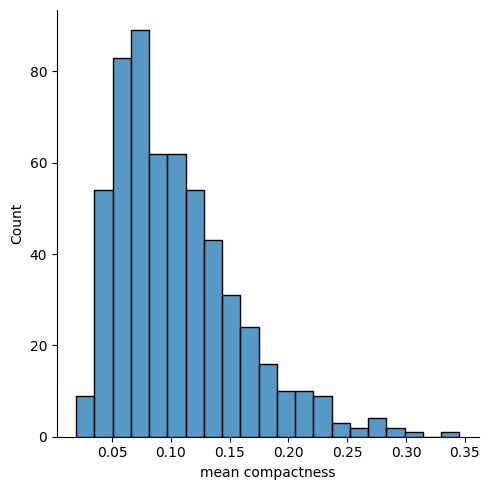

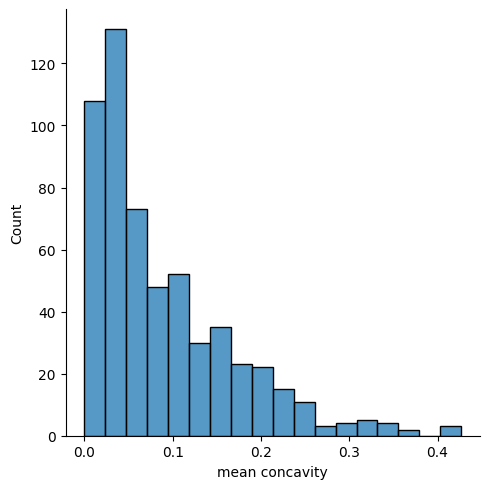

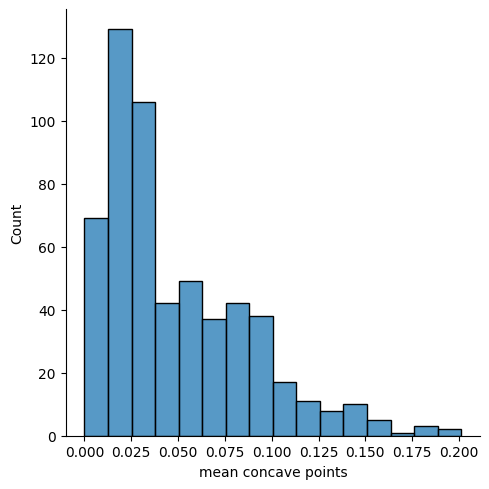

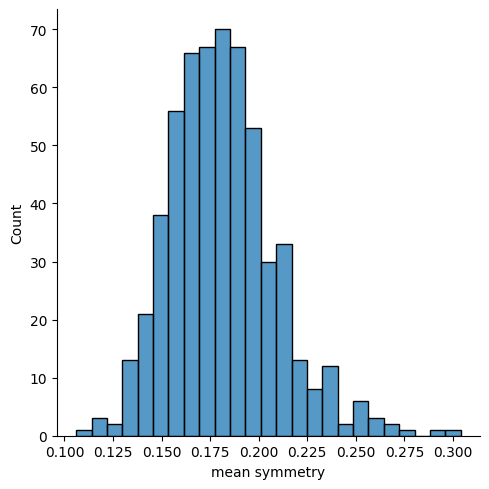

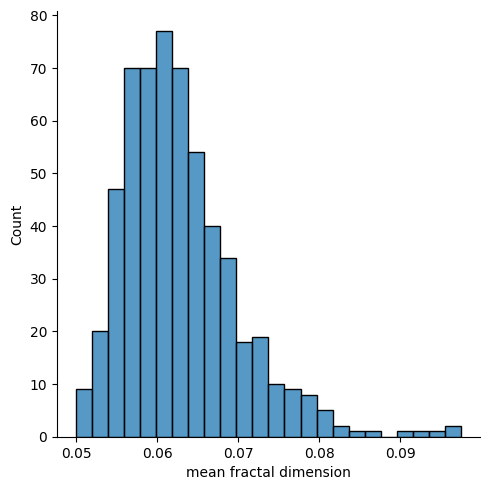

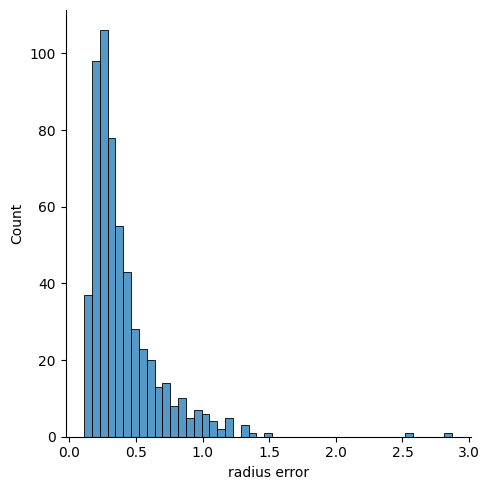

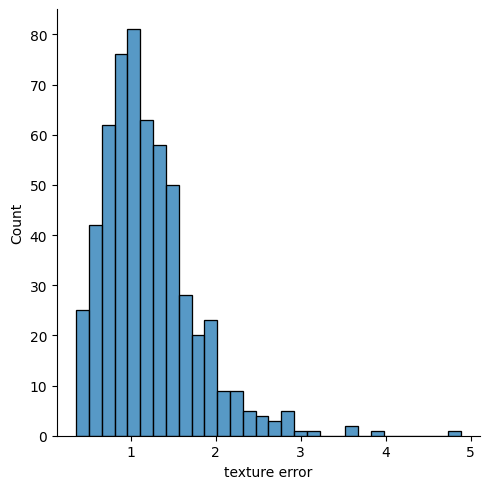

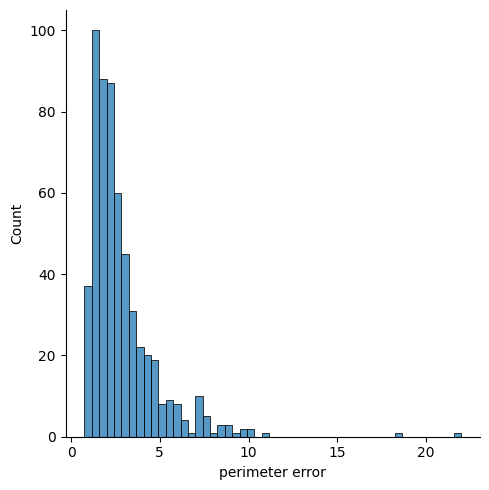

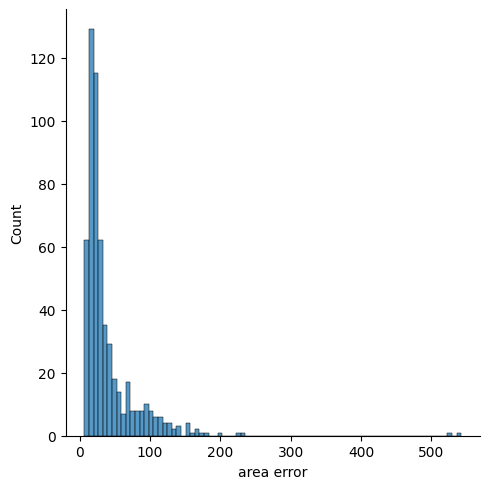

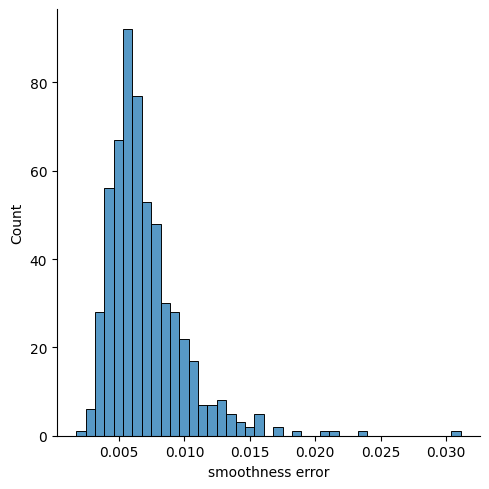

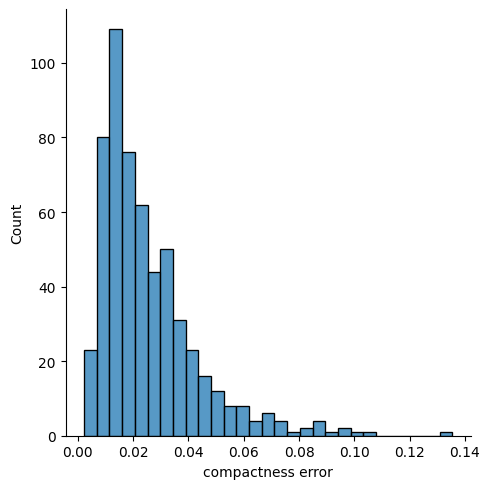

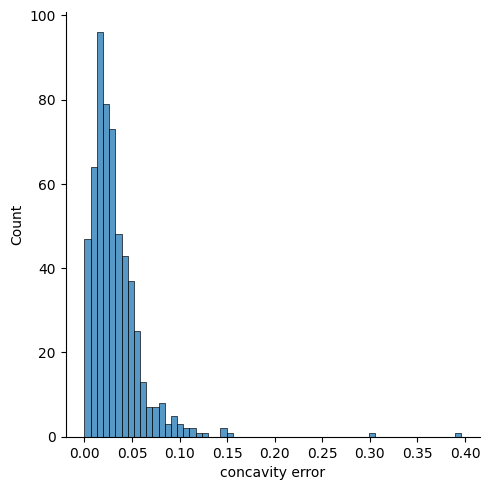

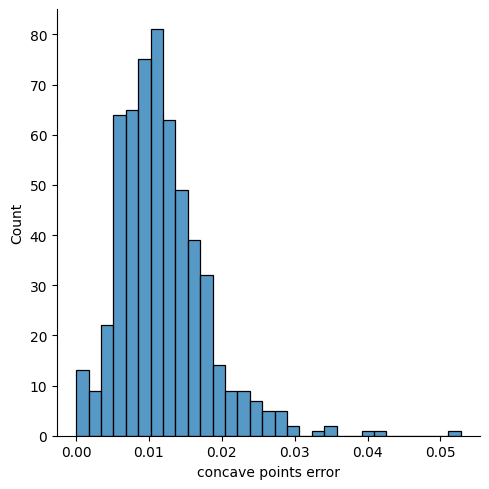

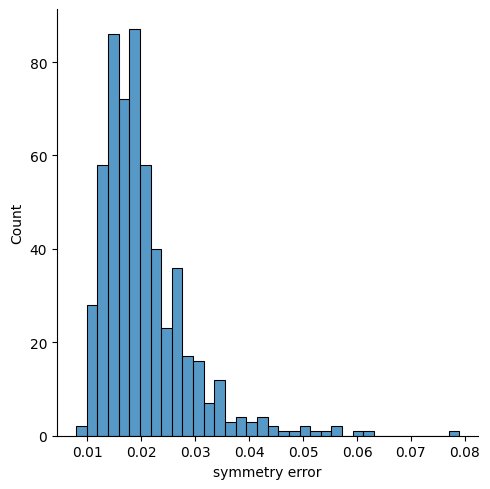

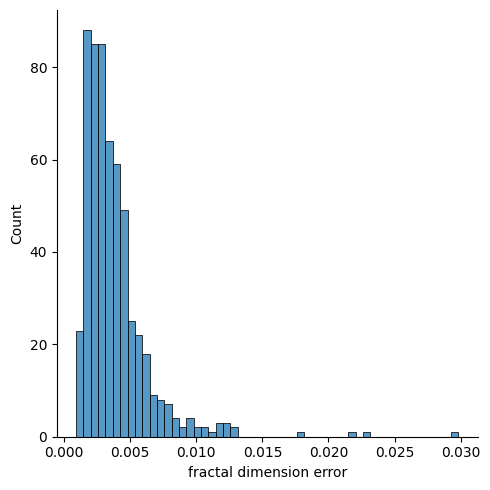

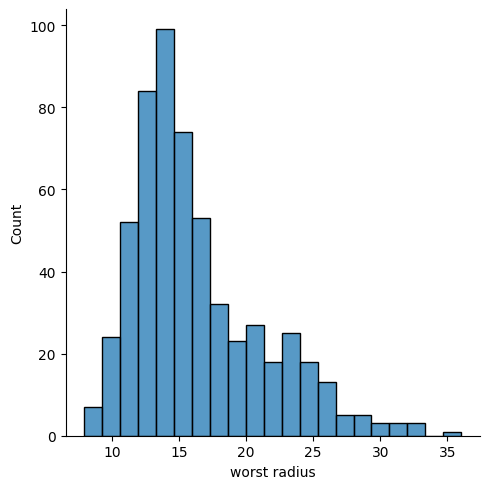

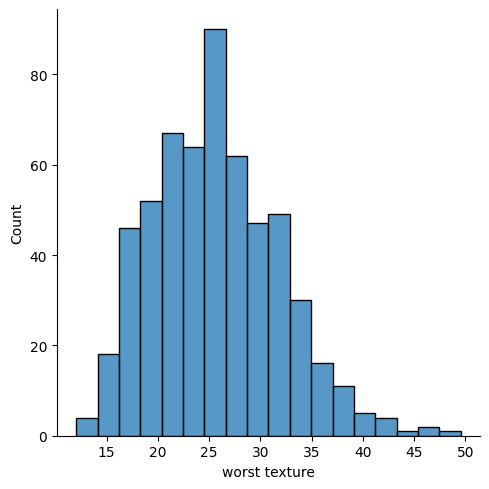

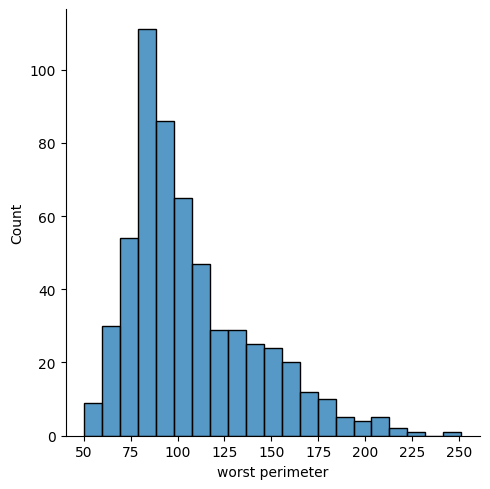

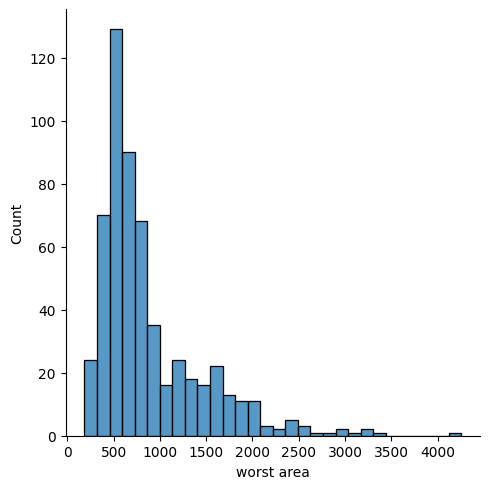

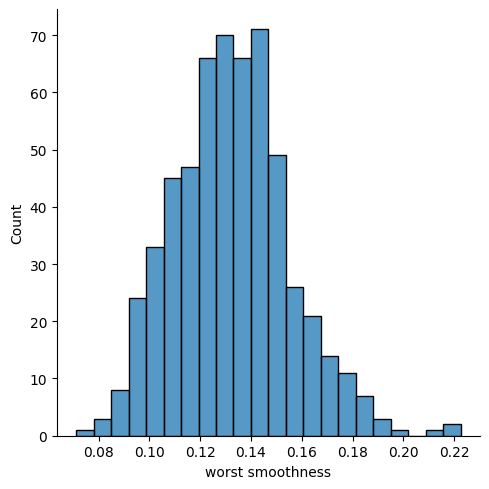

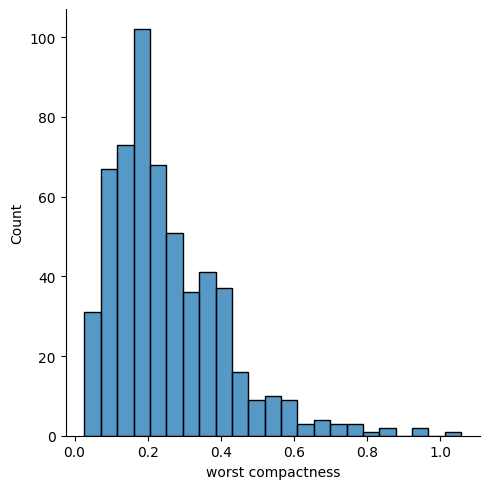

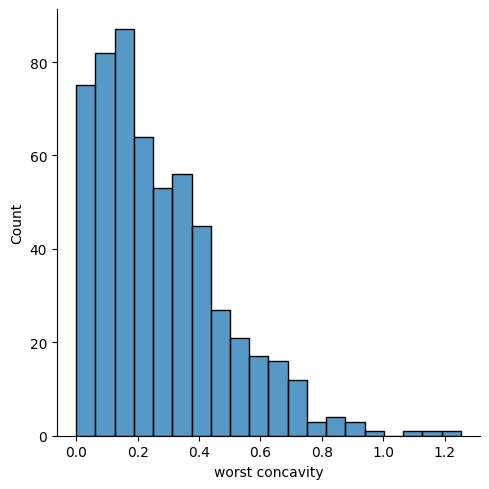

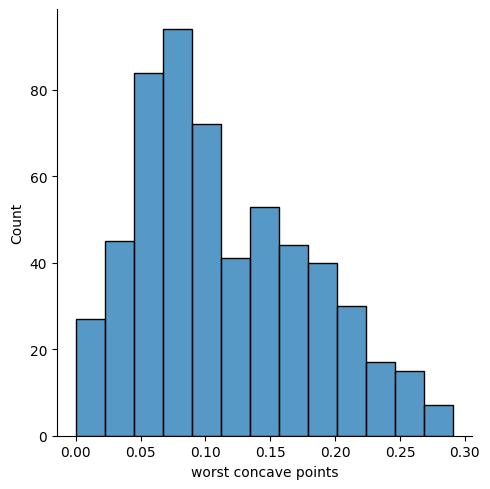

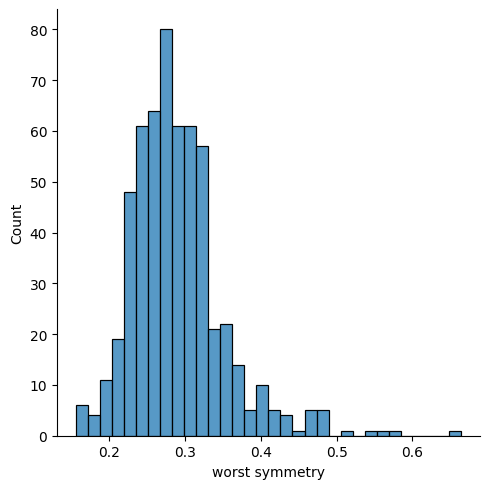

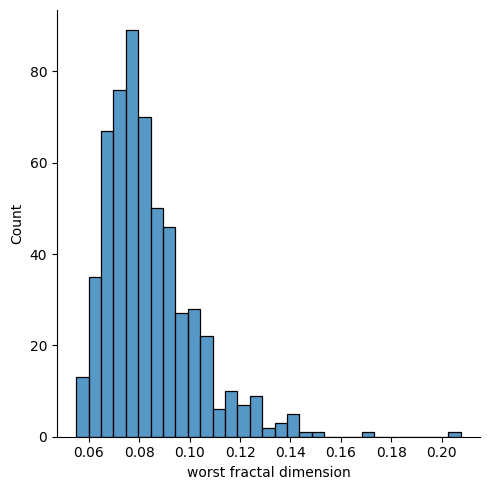

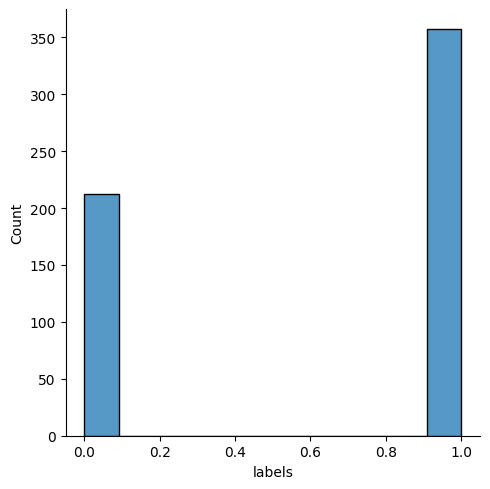

In [16]:
for columns in df:
    sns.displot(x=columns,data=df)
    plt.show()

<Axes: >

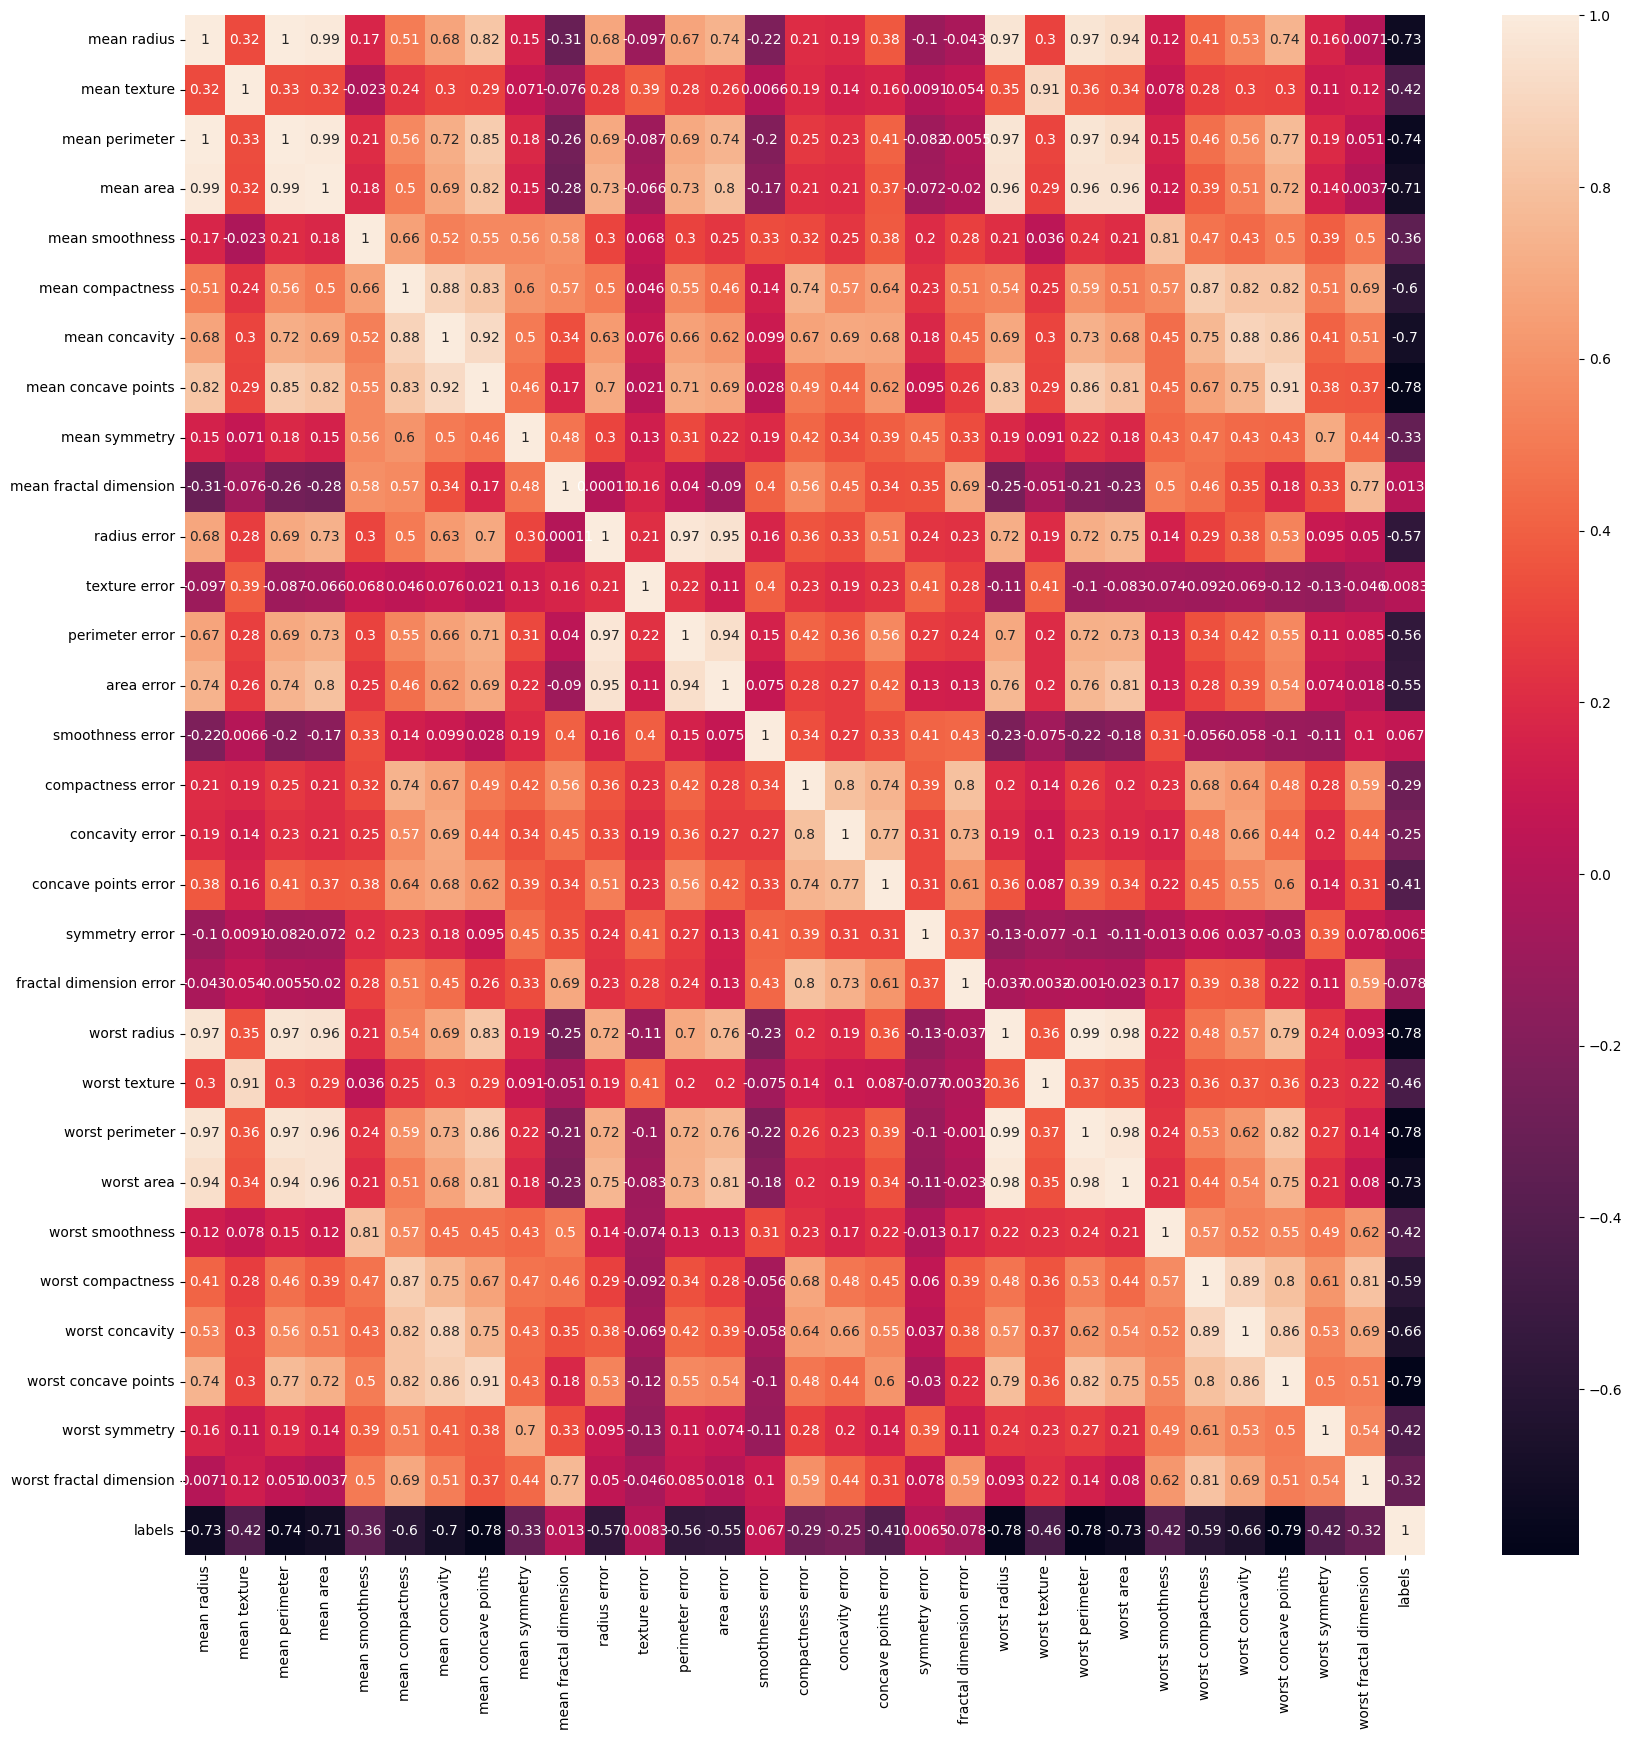

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

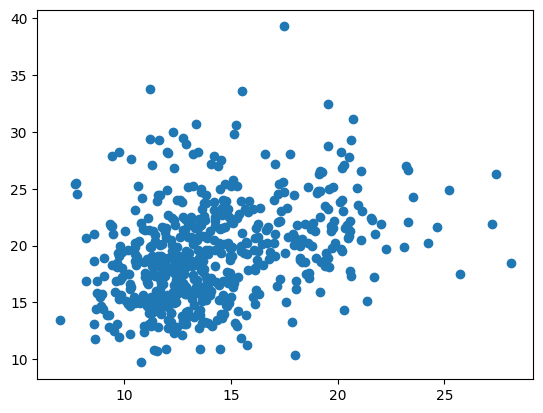

In [18]:
plt.scatter(df['mean radius'],df['mean texture'])


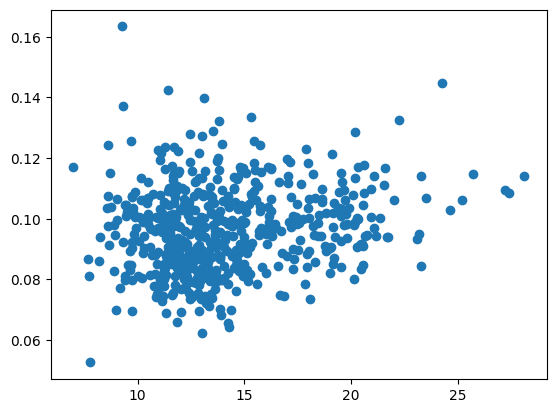

In [19]:
plt.scatter(df['mean radius'],df['mean smoothness'])

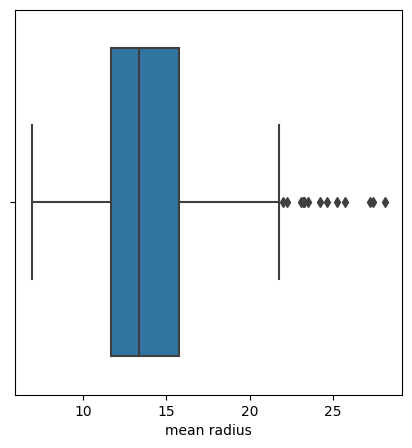

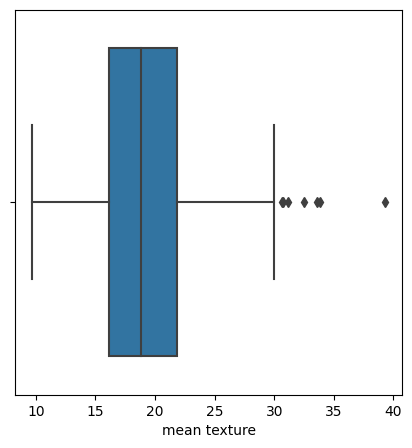

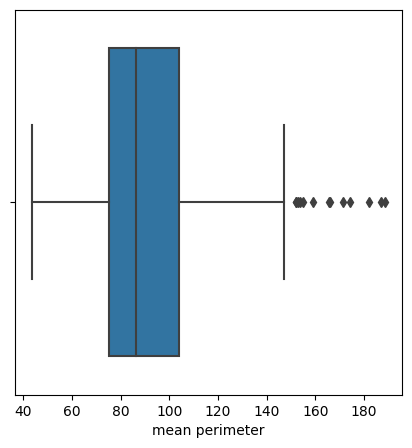

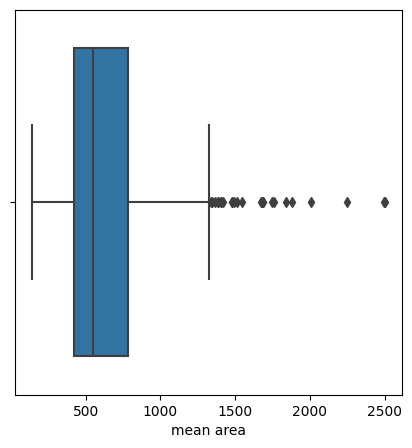

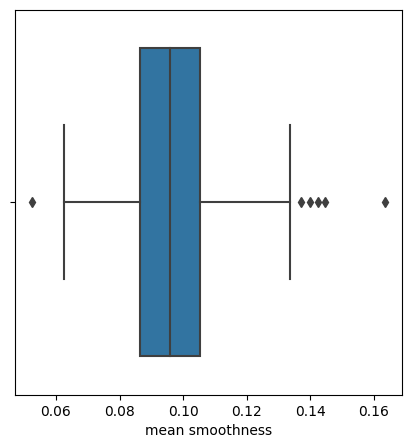

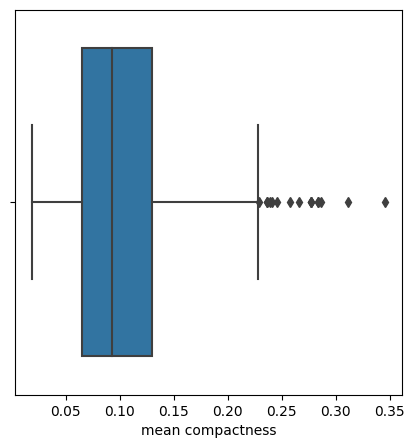

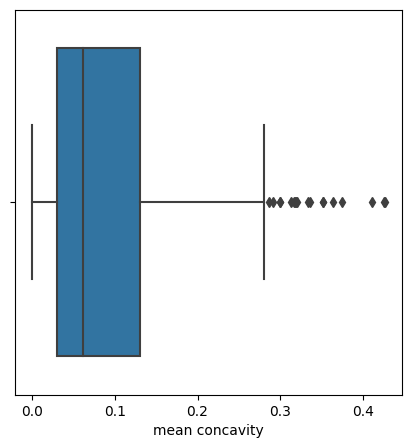

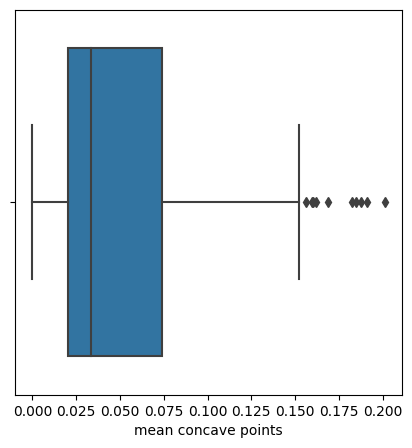

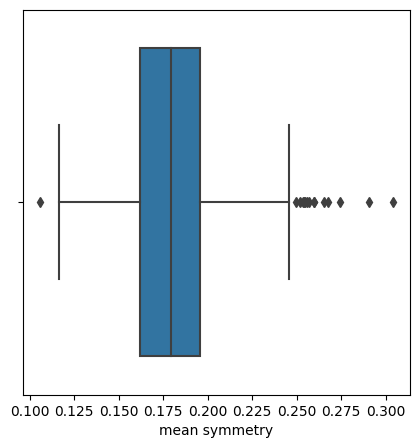

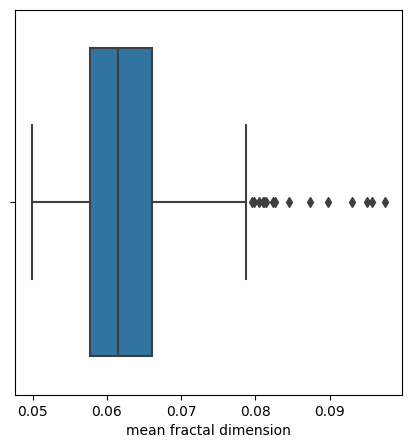

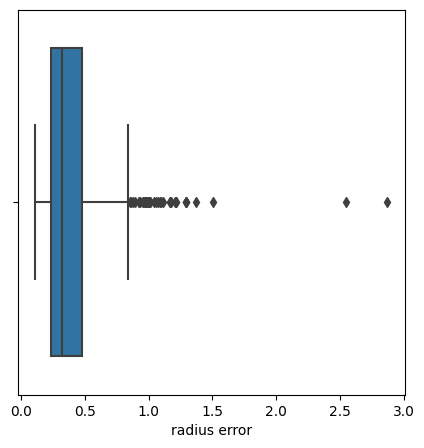

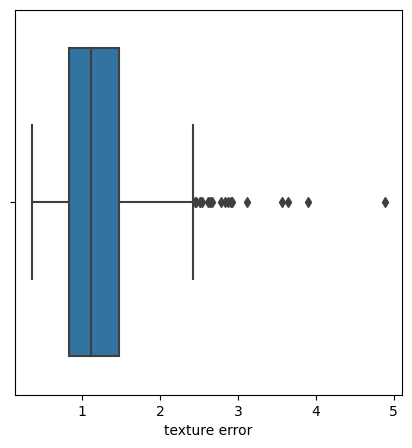

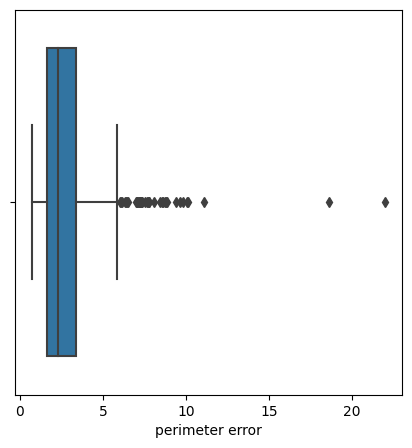

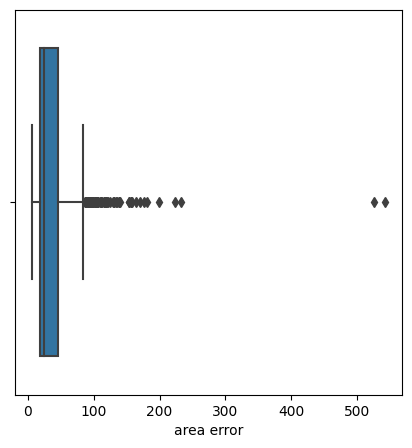

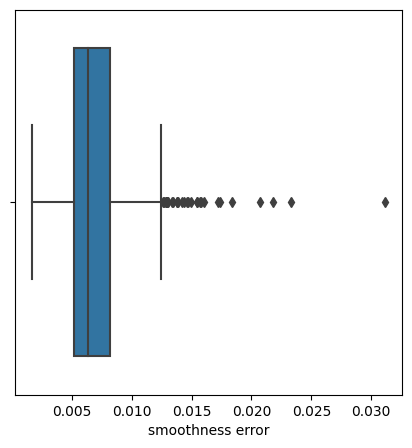

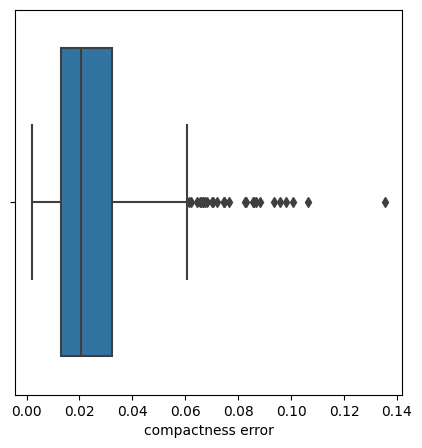

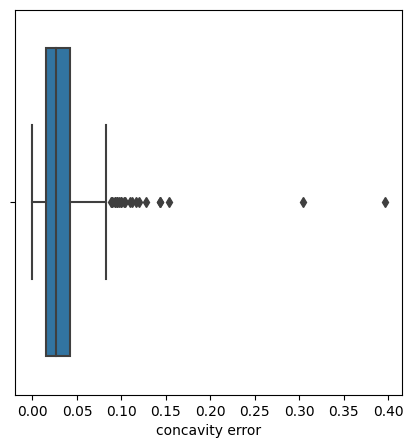

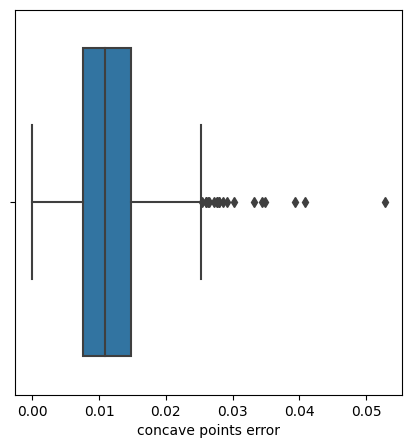

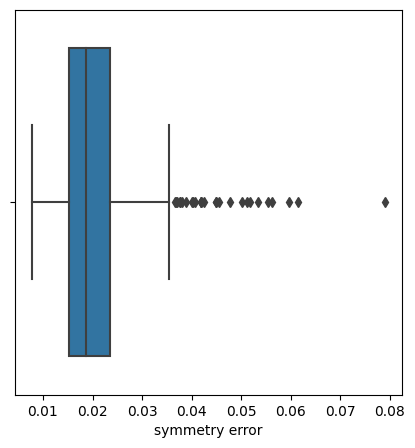

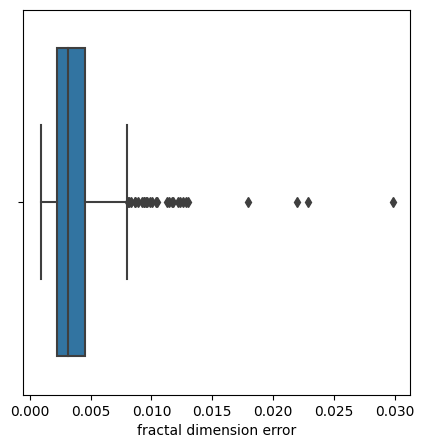

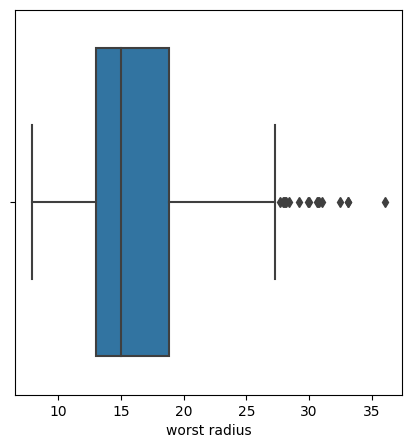

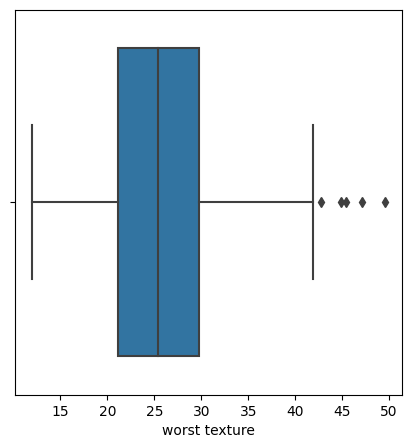

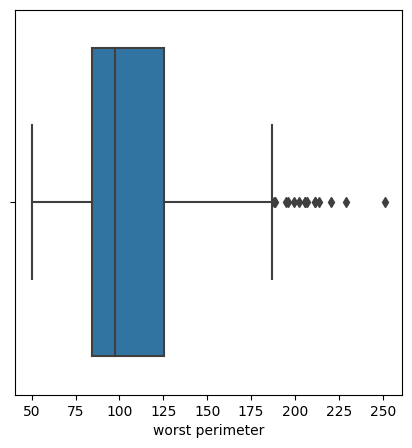

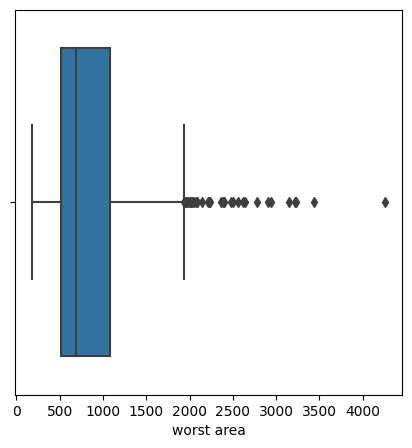

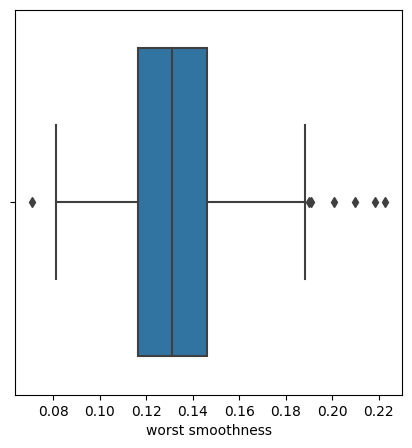

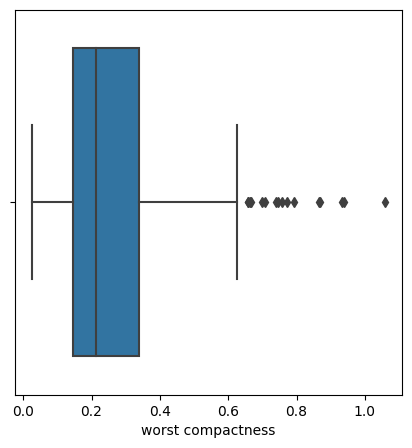

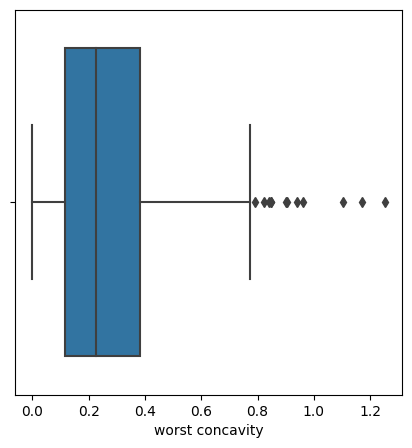

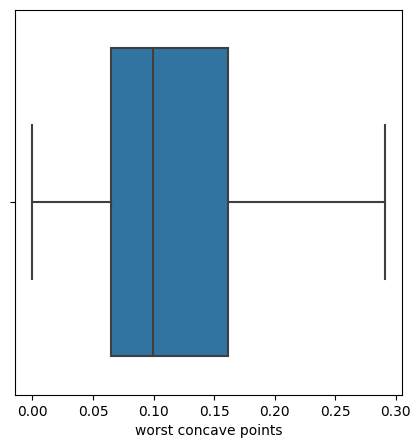

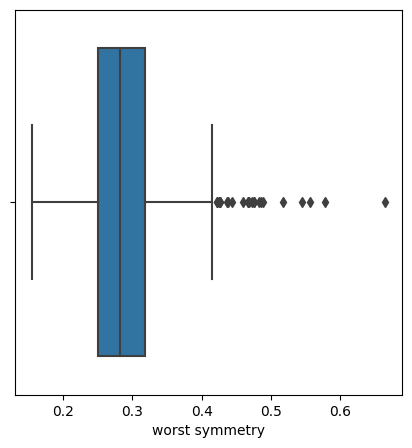

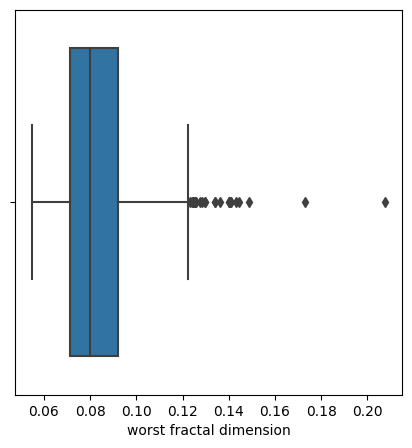

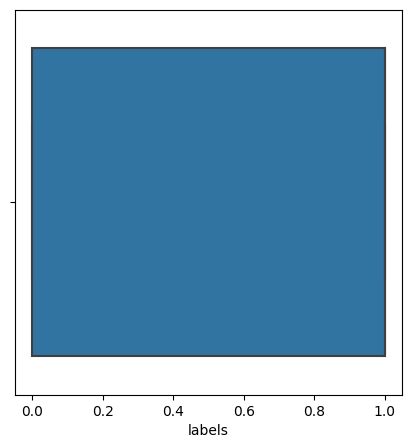

In [20]:
#box plot for the visualization of outliers in the data 
for columns in df:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=columns,data=df)

In [21]:
#dropping highly correlated columns
import pandas as pd
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns to drop (correlation > 0.70)
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop highly correlated columns
df_reduced = df.drop(columns=to_drop)

print("Columns dropped:", to_drop)
print("New dataframe shape:", df_reduced.shape)


Columns dropped: ['mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'compactness error', 'concavity error', 'concave points error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst fractal dimension', 'labels']
New dataframe shape: (569, 10)


In [22]:
df.drop(columns=(to_drop),inplace=True,axis=1)

In [23]:
df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,texture error,smoothness error,symmetry error,worst symmetry
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.01756,0.2364


In [24]:
df['labels']=breast_cancer_dataset.target

In [25]:
df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,texture error,smoothness error,symmetry error,worst symmetry,labels
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.03003,0.4601,0
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01389,0.2750,0
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.02250,0.3613,0
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.05963,0.6638,0
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.01756,0.2364,0


<Axes: >

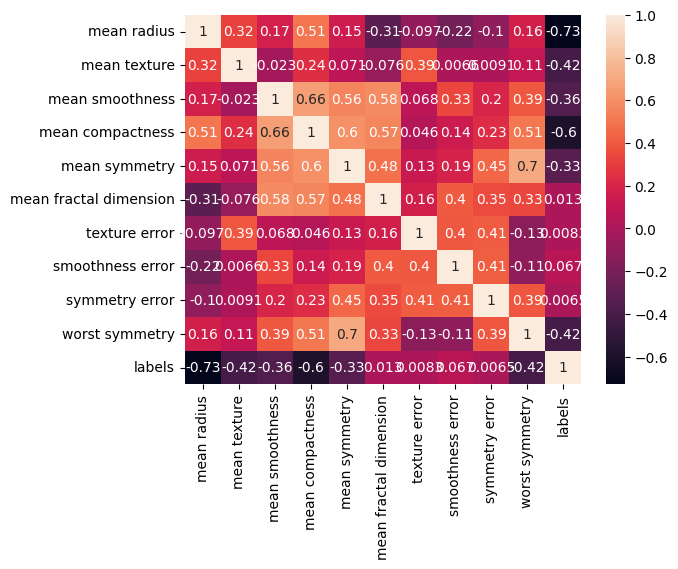

In [26]:
#check correlation
sns.heatmap(df.corr(),annot=True)

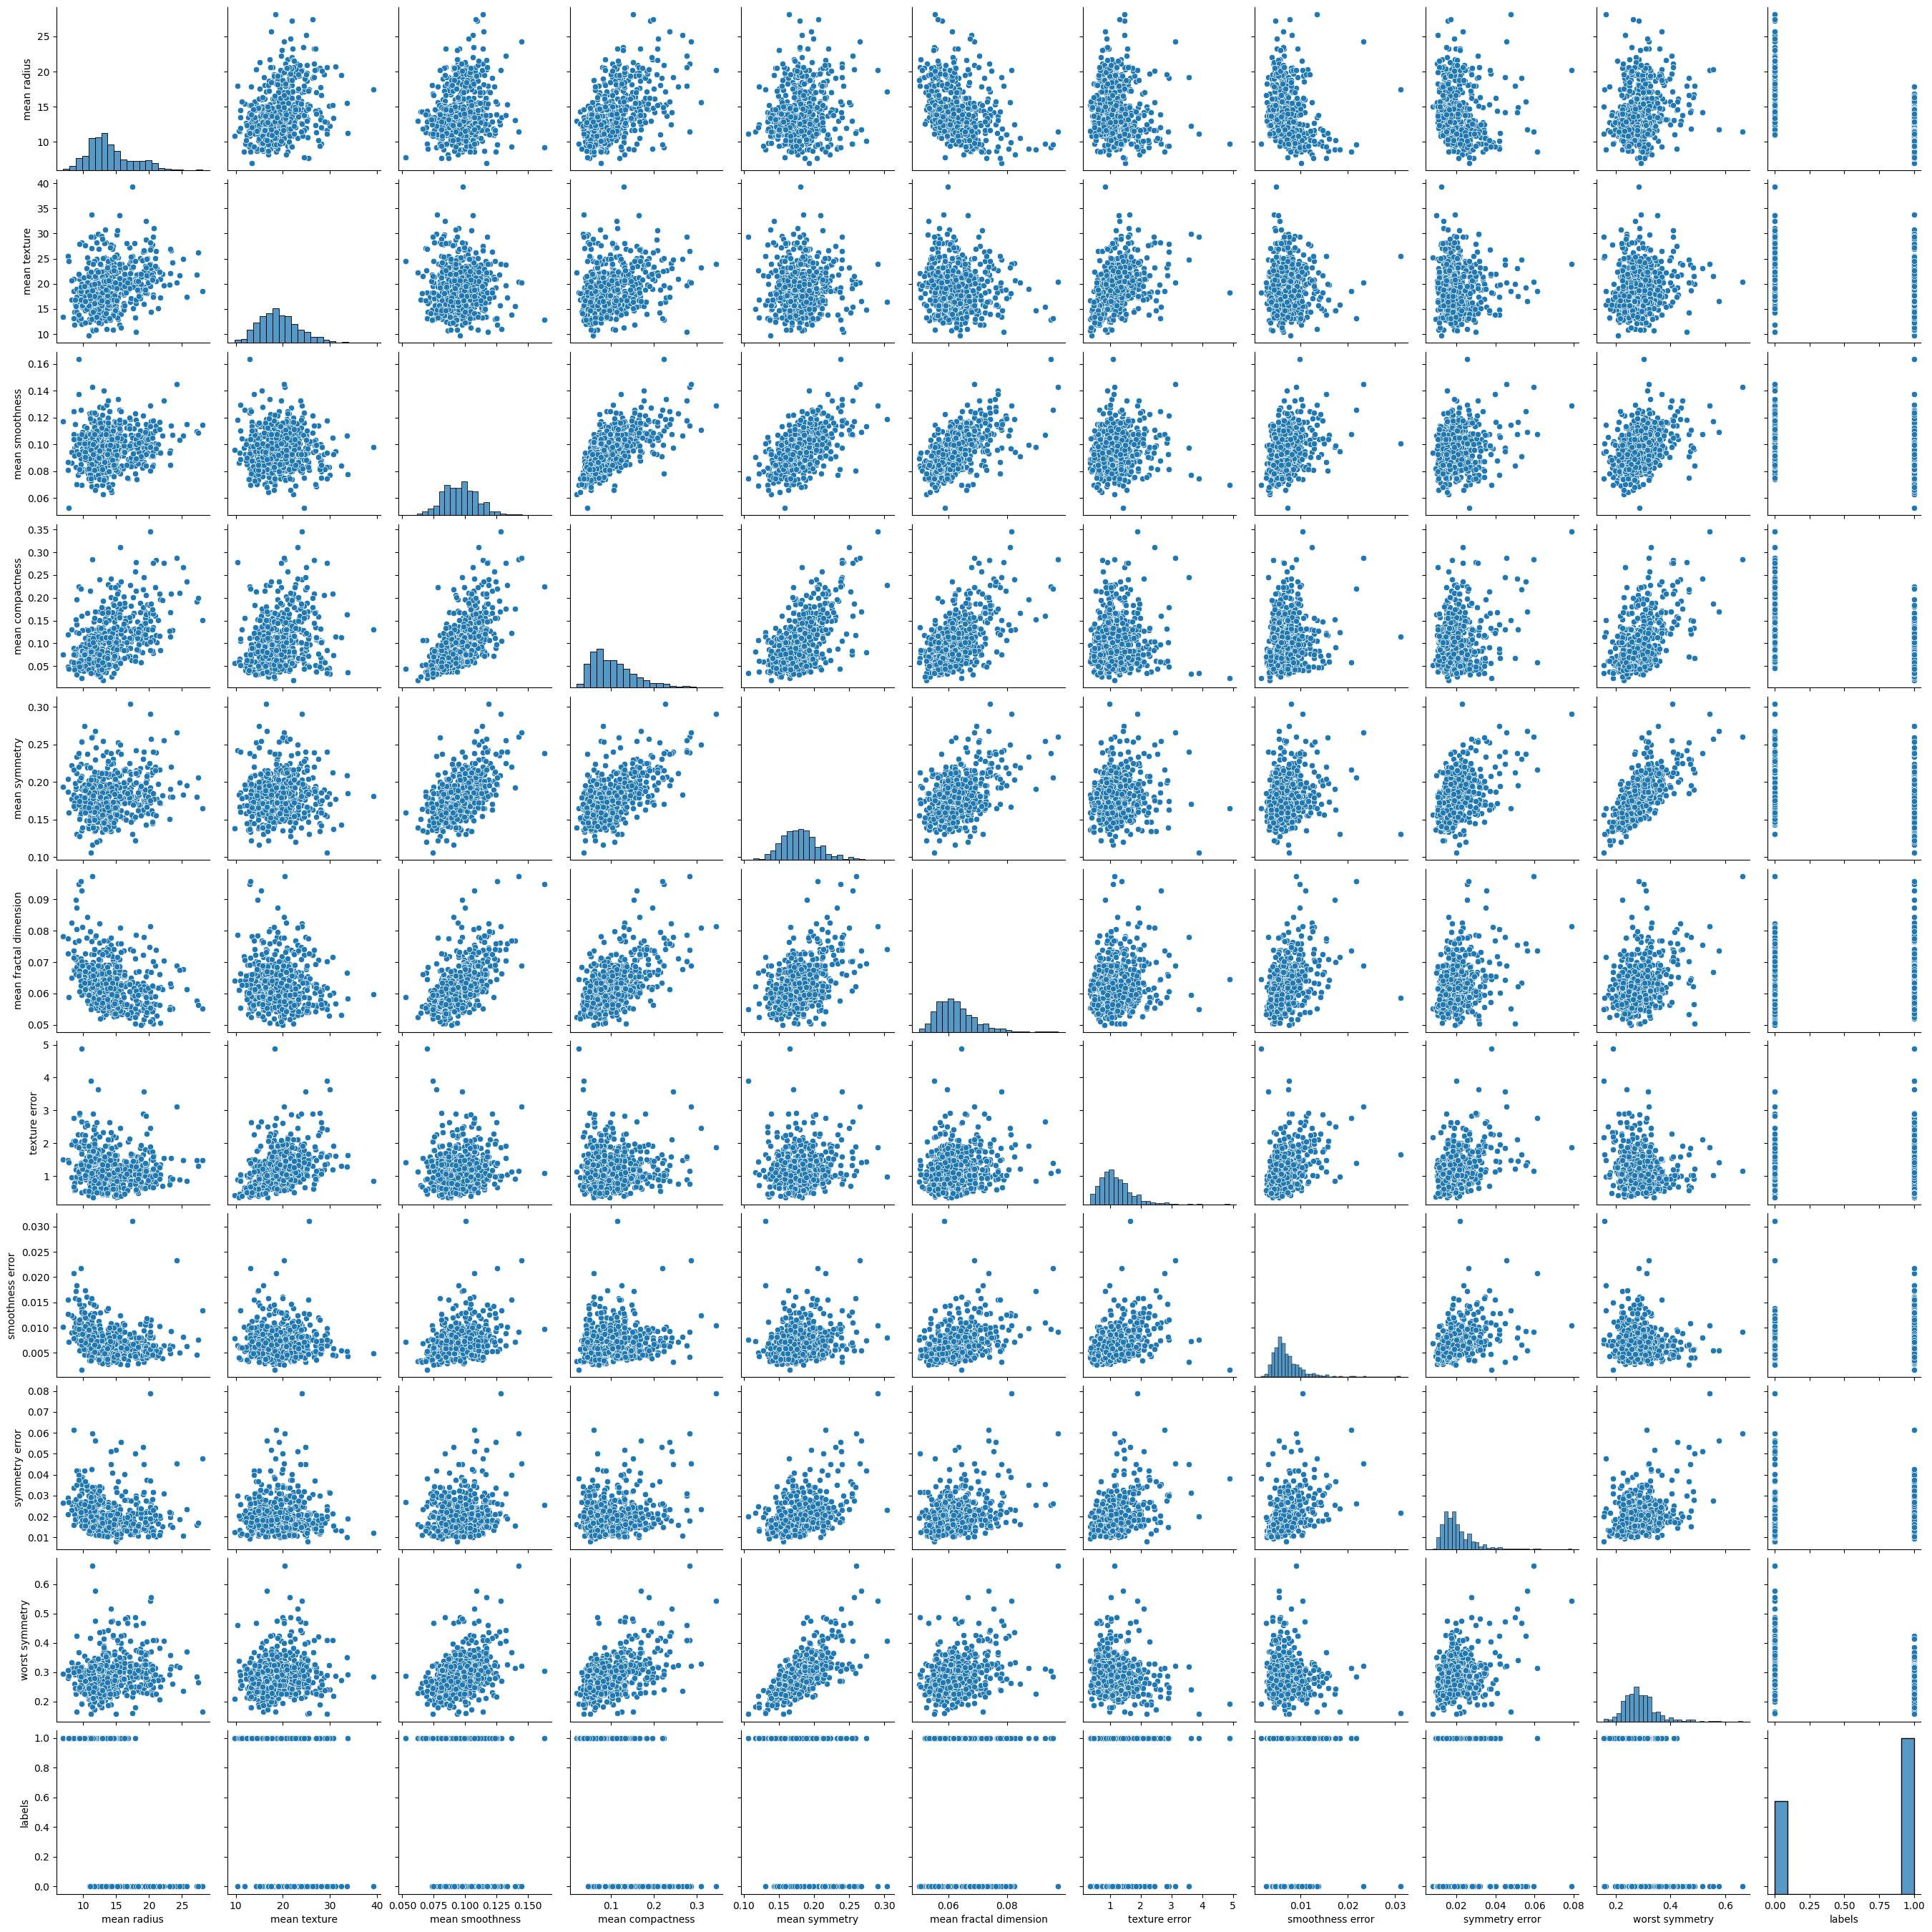

In [27]:
sns.pairplot(df)

In [28]:
#separating dependent and independent variables
X=df.iloc[:,:-1]

In [29]:
X.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,texture error,smoothness error,symmetry error,worst symmetry
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.01756,0.2364


In [30]:
y=df.iloc[:,-1]

In [31]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: labels, Length: 569, dtype: int64

In [32]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((426, 10), (143, 10), (426,), (143,))

In [34]:
# Scaling the data by using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [35]:
X_train_scaled.shape,X_test_scaled.shape

((426, 10), (143, 10))

In [36]:
import tensorflow as tf
tf.random.set_seed(33)
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

2025-10-13 10:38:49.888073: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760351930.094105      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760351930.144988      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [37]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=10))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])
##adding early stopping condition
early_stop = EarlyStopping(
    monitor='val_loss',    # metric to monitor
    patience=5,            # number of epochs to wait after no improvement
    restore_best_weights=True  # restores model weights from the epoch with best value of the monitored metric
)
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2,callbacks=[early_stop])

I0000 00:00:1760351942.132021      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/100


I0000 00:00:1760351944.700546      63 service.cc:148] XLA service 0x7d9de4007a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760351944.700942      63 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1760351944.930498      63 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4375 - loss: 0.6939

I0000 00:00:1760351945.455155      63 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.5069 - loss: 0.6855 - val_accuracy: 0.5581 - val_loss: 0.6677
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5978 - loss: 0.6389 - val_accuracy: 0.6395 - val_loss: 0.6051
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7307 - loss: 0.5723 - val_accuracy: 0.7907 - val_loss: 0.4935
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8552 - loss: 0.4581 - val_accuracy: 0.8605 - val_loss: 0.3927
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8869 - loss: 0.3485 - val_accuracy: 0.8721 - val_loss: 0.3254
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8937 - loss: 0.2772 - val_accuracy: 0.8721 - val_loss: 0.2886
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9137 - loss: 0.2312 - val_accuracy: 0.8721 - val_loss: 0.2652
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9137 - loss: 0.2002 - val_accuracy: 0.8721 - val_loss: 0

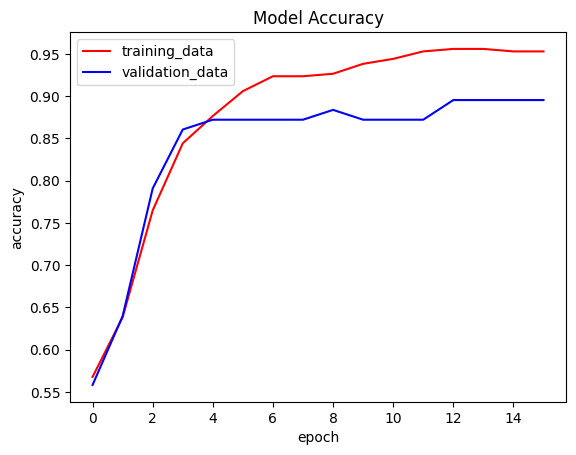

In [38]:
#visualizing accuracy and loss
plt.plot(history.history['accuracy'],color='red') #accuracy of training data
plt.plot(history.history['val_accuracy'],color='blue') #accuracy of test data
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training_data','validation_data'])
plt.show()

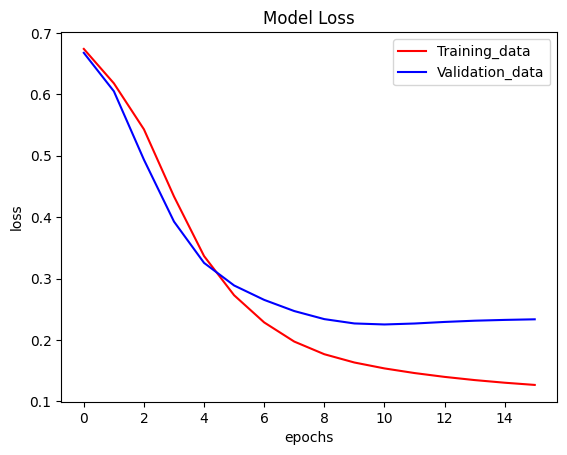

In [39]:
plt.plot(history.history['loss'],color='red') #loss of training data
plt.plot(history.history['val_loss'],color='blue') #loss of test data
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training_data','Validation_data'])
plt.show()